In [1]:
# 파일이름  : RandomDataGenerator.ipynb
# 코드설명  : 연속 확률 분포를 따르는 무작위 데이터 생성
# 입/출력   : 기간(st_time, ed_time), 시간 단위(t_unit), 시간 세분 정도(t_granuality), 확률 분포(cpd_type), 최소/최대값(min_val/max_val) / 데이터 세트
# 최종수정  : 2023년 12월 04일
# 제 작 자  : 홍민성 (mshong@micube.co.kr)
# Copyright : MICUBE Solution, Inc.

In [2]:
from datetime import timedelta, datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 데이터 값의 범위 조정 모듈
def minMaxScaler(data, min_val, max_val):
    return (data - np.min(data)) / (np.max(data) - np.min(data)) * (max_val - min_val) + min_val

# 두 시간 구간 사이의 timestamp 생성
def make_datetime_range(t_unit, t_granularity, st_time, ed_time):
    time_points=[]
    if t_unit == 'microseconds':
        granularity_unit=timedelta(microseconds=t_granularity)
    elif t_unit == 'milliseconds':
        granularity_unit=timedelta(milliseconds=t_granularity)
    elif t_unit == 'seconds':
        granularity_unit=timedelta(seconds=t_granularity)
    elif t_unit == 'minutes':
        granularity_unit=timedelta(minutes=t_granularity)
    elif t_unit == 'hours':
        granularity_unit=timedelta(hours=t_granularity)
    elif t_unit == 'days':
        granularity_unit=timedelta(days=t_granularity)
    else :
        raise Exception("Sorry, wrong granularity term")
    
    curr = st_time
    while curr <= ed_time:
        time_points.append(curr)
        curr += granularity_unit        
    
    return time_points
    
# 각 시간별 연속 확률 분포를 따르는 무작위 데이터 생성
def get_rd_data_df(cpd_type, min_val, max_val, t_unit, t_granularity, st_time, ed_time, SEED=42):
    # cpd_type : 'Gaussian','Multivariate_normal','Log_normal','Beta','Gamma','Uniform','Exponential'
    # t_unit : 'microseconds','milliseconds','seconds','minutes','hours','days'

    np.random.seed(SEED)
    rd_data_df = pd.DataFrame()

    time_points = make_datetime_range(t_unit, t_granularity, st_time, ed_time)
    size_ = len(time_points)

    if cpd_type=='Gaussian':
        rd_values = np.random.normal(size=size_)
    elif cpd_type=='Multivariate_normal':
        rd_values = np.random.multinomial(size=size_)
    elif cpd_type=='Log_normal':
        rd_values = np.random.lognormal(size=size_)
    elif cpd_type=='Beta':
        rd_values = np.random.beta(size=size_)
    elif cpd_type=='Gamma':
        rd_values = np.random.gamma(size=size_)
    elif cpd_type=='Uniform':
        rd_values = np.random.uniform(size=size_)
    elif cpd_type=='Exponential':
        rd_values = np.random.exponential(size=size_)
    else :
        raise Exception("Sorry, wrong distibution term")
    
    rd_data_df['Timestamp'] = time_points
    # 생성 데이터 범위 조정
    rd_data_df['Value'] = minMaxScaler(rd_values, min_val, max_val)

    return rd_data_df    

### 확률분포와 기간, 시간 단위 등으로 랜덤 데이터 생성

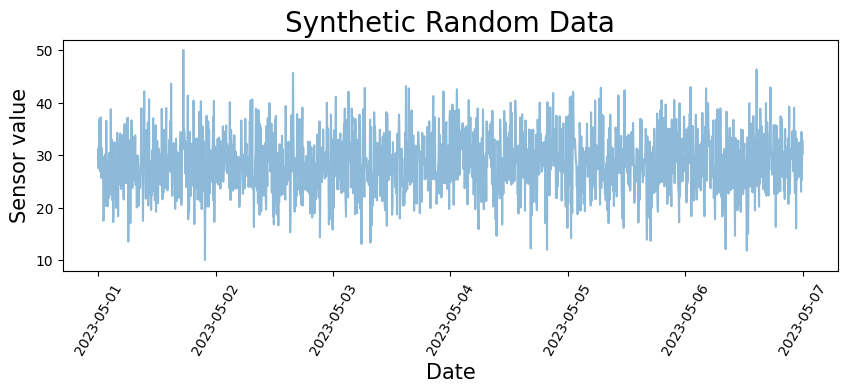

In [24]:
cpd_type = 'Gaussian'                   # 연속확률분포타입 : 'Gaussian','Multivariate_normal','Log_normal','Beta','Gamma','Uniform','Exponential'
t_unit = 'minutes'                        # 시간단위 : 'microseconds','milliseconds','seconds','minutes','hours','days'
t_granularity = 5                       # 시간 세분 정도
st_time = datetime(2023, 5, 1)
ed_time = datetime(2023, 5, 7)

min_val = 10
max_val = 50

# 분포에 따른 데이터 생성
rd_data_df = get_rd_data_df(cpd_type, min_val, max_val, t_unit, t_granularity, st_time, ed_time)

plt.figure(figsize=(10, 3))
plt.plot(rd_data_df['Timestamp'], rd_data_df['Value'], alpha=0.5)
plt.xlabel("Date", size=15)
plt.ylabel("Sensor value", size=15)
plt.title("Synthetic Random Data", size=20)
plt.xticks(rotation=60)
plt.show()

### 생성된 데이터의 확률밀도함수(분포도) 시각화

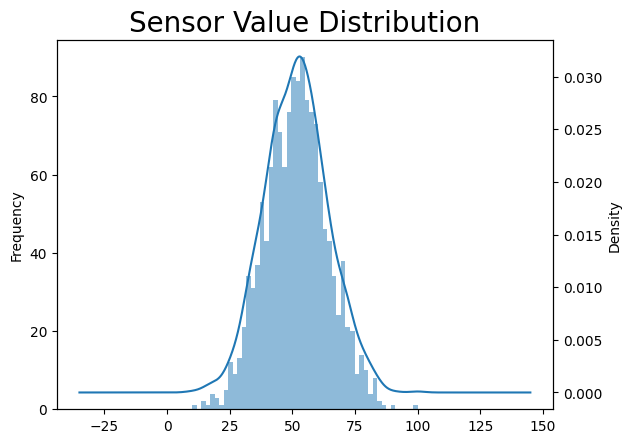

In [11]:
fig, ax = plt.subplots()
rd_data_df['Value'].plot.hist(ax=ax, alpha=0.5, bins=50)
ax2 = ax.twinx()
rd_data_df['Value'].plot.kde(ax=ax2)
ax.set_title("Sensor Value Distribution", size = 20)
plt.show()